In [1]:
#Import Pandas, Numpy, Matplotlib, and Seaborn packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import nltk package (Natural Language Processing package)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Import Vectorizer functions from sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Import train_test_split for spliting the data into train/test 
from sklearn.model_selection import train_test_split


#Import classifiers from sklearn package 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

#Import metrics from sklearn package for model evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Import GridSearchCV for tuning hyperparameters for classifiers 
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('C:\Users\Rezanick\Desktop\Projects\Springboard\Intermediate data science with python\Capstone Project\spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print(df.columns)
print(df.index)

Index([u'v1', u'v2', u'Unnamed: 2', u'Unnamed: 3', u'Unnamed: 4'], dtype='object')
RangeIndex(start=0, stop=5572, step=1)


In [5]:
df=df[['v1','v2']]
df.columns=['Label','Text']

In [6]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print(df.groupby('Label').count())

       Text
Label      
ham    4825
spam    747


In [8]:
df['Length']=df.loc[:,'Text'].apply(len)

In [9]:
df.head(10)

,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [10]:
df.groupby('Label').describe()

Length                                                         
        count        mean        std   min    25%    50%    75%    max
Label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

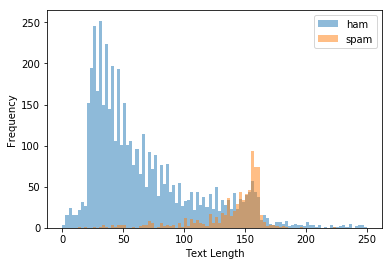

In [11]:
df['Length'][df['Label']=='ham'].plot(kind='hist', bins=100, range=[0,250], alpha=0.5, label='ham')
df['Length'][df['Label']=='spam'].plot(kind='hist', bins=100, range=[0,250], alpha=0.5, label='spam')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
counter = CountVectorizer(analyzer='word', stop_words = 'english', decode_error = 'ignore',  max_features=5000)

Below, we create the word frequency charts for spam/ham messages separately

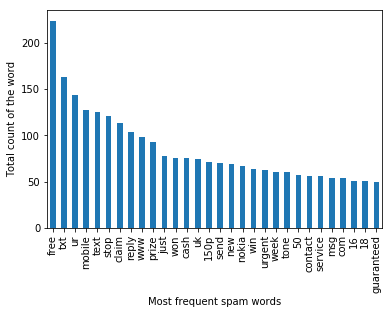

In [13]:
spam=df[df['Label']=='spam']
ham=df[df['Label']=='ham']

spam_msg=spam['Text']
spam_msg=spam_msg.tolist()

ham_msg=ham['Text']
ham_msg=ham_msg.tolist()

#Implement CountVectorizer to tokenize spam and ham messages 
#Tokens are stored in words variable
count=counter.fit(spam_msg)
c=counter.transform(spam_msg)
spam_words=count.get_feature_names()

#c variable (vecotorized version of the text messages) is stored as sparse matrix. This object is converted to pandas df.

c2=pd.DataFrame(c.todense())

c2=np.array(c2)
df_count=pd.DataFrame(c2.sum(axis=0))
df_count.index=spam_words
df_count.columns=['Count']
df_count

sorted_spam_word=df_count.sort_values(by='Count', ascending=False)
sorted_spam_word.head(10)

sorted_spam_word['Count'][0:30].plot(kind='bar')
plt.xlabel('Most frequent spam words')
plt.ylabel('Total count of the word')
plt.show()

In [14]:
sorted_spam_word.head(10)

,Count
free,224
txt,163
ur,144
mobile,127
text,125
stop,121
claim,113
reply,104
www,98
prize,93


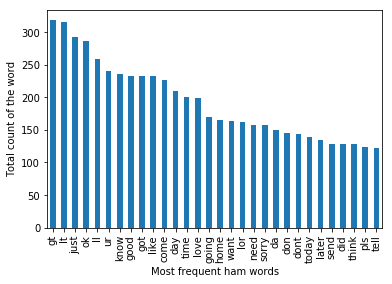

In [15]:
spam=df[df['Label']=='spam']
ham=df[df['Label']=='ham']

spam_msg=spam['Text']
spam_msg=spam_msg.tolist()

ham_msg=ham['Text']
ham_msg=ham_msg.tolist()
[x.lower() for x in ham_msg]
#Implement CountVectorizer to tokenize spam and ham messages 
#Tokens are stored in words variable
count=counter.fit(ham_msg)
c=counter.transform(ham_msg)
ham_words=count.get_feature_names()

#c variable (vecotorized version of the text messages) is stored as sparse matrix. This object is converted to pandas df.

c2=pd.DataFrame(c.todense())

c2=np.array(c2)
df_count=pd.DataFrame(c2.sum(axis=0))
df_count.index=ham_words
df_count.columns=['Count']
df_count

sorted_ham_word=df_count.sort_values(by='Count', ascending=False)
sorted_ham_word.head(10)

sorted_ham_word['Count'][0:30].plot(kind='bar')
plt.xlabel('Most frequent ham words')
plt.ylabel('Total count of the word')
plt.show()

tf-idf representation of the text messages 

In [16]:
vect = TfidfVectorizer(decode_error = 'ignore', max_df= 0.8, max_features = 1000)
tf_idf= vect.fit_transform(df['Text'])
X=tf_idf.toarray()
Y=df['Label']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

Hyperparameters Tuning 

In [18]:
#SVM classifier hyperparameter tuning 
#Hyperparameters: Kernel and gamma 

parameters= { "kernel" : ['rbf','poly','sigmoid'],
             "gamma" : np.linspace(0.05, 1, num=10)}

# Instantiate a logistic regression classifier: logreg
svc = SVC()

# Instantiate the GridSearchCV object: logreg_cv
svc_cv = GridSearchCV(svc, parameters, cv=5)

# Fit it to the data
svc_cv.fit(X_train, Y_train)

# Print the tuned parameter and score
print("Tuned SVM Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))

Tuned SVM Parameters: {'kernel': 'sigmoid', 'gamma': 0.78888888888888897}
Best score is 0.98474310074


In [19]:
#K-Nearest Neighbors classifier hyperparameter tuning 
#Hyperparameters: Kernel and gamma 

parameters= { "n_neighbors" : range(3,25)}

# Instantiate a KNN classifier: knc
knc= KNeighborsClassifier()

# Instantiate the GridSearchCV object: knc_cv
knc_cv = GridSearchCV(knc, parameters, cv=5)

# Fit it to the data
knc_cv.fit(X_train, Y_train)

# Print the tuned parameter and score
print("Tuned K-nearest neighbors Parameters: {}".format(knc_cv.best_params_))
print("Best score is {}".format(knc_cv.best_score_))

Tuned K-nearest neighbors Parameters: {'n_neighbors': 3}
Best score is 0.91922818039


In [30]:
#Multinomial Naive Bayes classifier hyperparameter tuning 
#Hyperparameters: alpha 

parameters= { "alpha" : np.linspace(0.05, 1, num=10)}

# Instantiate a KNN classifier: mnb
mnb= MultinomialNB()

# Instantiate the GridSearchCV object: mnb_cv
mnb_cv = GridSearchCV(mnb, parameters, cv=5)

# Fit it to the data
mnb_cv.fit(X_train,Y_train)

# Print the tuned parameter and score
print("Tuned Multinomial Naive Bayes Parameters: {}".format(mnb_cv.best_params_))
print("Best score is {}".format(mnb_cv.best_score_))

Tuned Multinomial Naive Bayes Parameters: {'alpha': 0.050000000000000003}
Best score is 0.984518734575


In [24]:
#Decision Tree classifier hyperparameter tuning 
#Hyperparameters: min_samples_split

parameters= { "min_samples_split" : range(2,21)}

# Instantiate a KNN classifier: dtc
dtc= DecisionTreeClassifier()

# Instantiate the GridSearchCV object: dtc_cv
dtc_cv = GridSearchCV(dtc, parameters, cv=5)

# Fit it to the data
dtc_cv.fit(X_train, Y_train )

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(dtc_cv.best_params_))
print("Best score is {}".format(dtc_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 15}
Best score is 0.966569441328


In [26]:
#Logistic Regression classifier hyperparameter tuning 
#Hyperparameters: 

parameters= { "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

# Instantiate a Logistic Regression classifier: lrc
lrc= LogisticRegression()

# Instantiate the GridSearchCV object: lrc_cv
lrc_cv = GridSearchCV(lrc, parameters, cv=5)

# Fit it to the data
lrc_cv.fit(X_train, Y_train)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(lrc_cv.best_params_))
print("Best score is {}".format(lrc_cv.best_score_))

Tuned Logistic Regression Parameters: {'solver': 'newton-cg'}
Best score is 0.973524792461


In [27]:
#Random Forest classifier hyperparameter tuning 
#Hyperparameters: 

parameters= {"n_estimators" : range(2,36)}

# Instantiate a Logistic Regression classifier: rfc
rfc= RandomForestClassifier()

# Instantiate the GridSearchCV object: rfc_cv
rfc_cv = GridSearchCV(rfc, parameters, cv=5)

# Fit it to the data
rfc_cv.fit(X_train, Y_train)

# Print the tuned parameter and score
print("Tuned Random Forest Classifier Parameters: {}".format(rfc_cv.best_params_))
print("Best score is {}".format(rfc_cv.best_score_))

Tuned Random Forest Classifier Parameters: {'n_estimators': 27}
Best score is 0.980255777429


In [29]:
#AdaBoost classifier hyperparameter tuning 
#Hyperparameters: 

parameters= {"n_estimators" : range(2,21)}

# Instantiate a Logistic Regression classifier: rfc
abc= AdaBoostClassifier()

# Instantiate the GridSearchCV object: rfc_cv
abc_cv = GridSearchCV(abc, parameters, cv=5)

# Fit it to the data
abc_cv.fit(X_train, Y_train)

# Print the tuned parameter and score
print("Tuned Bagging Classifier Parameters: {}".format(abc_cv.best_params_))
print("Best score is {}".format(abc_cv.best_score_))

Tuned Bagging Classifier Parameters: {'n_estimators': 19}
Best score is 0.957370428539


In [28]:
#Bagging classifier hyperparameter tuning 
#Hyperparameters: 

parameters= {"n_estimators" : range(2,21)}

# Instantiate a Logistic Regression classifier: rfc
bc= BaggingClassifier()

# Instantiate the GridSearchCV object: rfc_cv
bc_cv = GridSearchCV(bc, parameters, cv=5)

# Fit it to the data
bc_cv.fit(X_train, Y_train)

# Print the tuned parameter and score
print("Tuned Bagging Classifier Parameters: {}".format(bc_cv.best_params_))
print("Best score is {}".format(bc_cv.best_score_))

Tuned Bagging Classifier Parameters: {'n_estimators': 16}
Best score is 0.971954229302


In [35]:
svc = SVC(kernel='sigmoid', gamma=0.78)
knc = KNeighborsClassifier(n_neighbors=3)
mnb = MultinomialNB(alpha=0.05)
dtc = DecisionTreeClassifier(min_samples_split=15, random_state=100)
lrc = LogisticRegression(solver='newton-cg', penalty='l2')
rfc = RandomForestClassifier(n_estimators=27, random_state=100)
abc = AdaBoostClassifier(n_estimators=19, random_state=100)
bc = BaggingClassifier(n_estimators=16, random_state=100)

In [36]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc}

In [37]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
    
def predict_labels(clf, features):
    return (clf.predict(features))

In [38]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, Y_train)
    pred = predict_labels(v,X_test)
    pred_scores.append((k, accuracy_score(Y_test,pred),precision_score(Y_test, pred, pos_label='spam'), f1_score(Y_test, pred, pos_label='spam'), recall_score(Y_test, pred, pos_label='spam')))

In [39]:
df = pd.DataFrame(pred_scores, columns=['Method','Accuracy','Precision', 'f1', 'recall'])
df.set_index('Method')

,Accuracy,Precision,f1,recall
Method,,,,
RF,0.984753,0.992308,0.938182,0.889655
BgC,0.969507,0.888112,0.881944,0.875862
LR,0.978475,0.991870,0.910448,0.841379
AdaBoost,0.959641,0.931034,0.827586,0.744828
NB,0.983857,0.963504,0.936170,0.910345
SVC,0.986547,0.977941,0.946619,0.917241
DT,0.963229,0.842105,0.861953,0.882759
KN,0.945291,0.988372,0.735931,0.586207


In [40]:
df.sort_values('Accuracy', ascending=False)
df.set_index('Method')

,Accuracy,Precision,f1,recall
Method,,,,
RF,0.984753,0.992308,0.938182,0.889655
BgC,0.969507,0.888112,0.881944,0.875862
LR,0.978475,0.991870,0.910448,0.841379
AdaBoost,0.959641,0.931034,0.827586,0.744828
NB,0.983857,0.963504,0.936170,0.910345
SVC,0.986547,0.977941,0.946619,0.917241
DT,0.963229,0.842105,0.861953,0.882759
KN,0.945291,0.988372,0.735931,0.586207


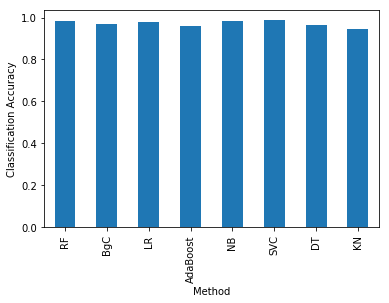

In [41]:
df.plot(kind='bar', x='Method', y='Accuracy', legend=False)
plt.ylabel('Classification Accuracy')
plt.show()